In [1]:
import cv2
import numpy as np

image = cv2.imread("C:\\Users\\Bruger\\Downloads\\cat.jpg", cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_direction = np.arctan2(sobel_y, sobel_x)

gradient_direction_degrees = (gradient_direction * 180 / np.pi) % 180

cv2.imshow('Original Image', image)
cv2.imshow('Gradient Magnitude', gradient_magnitude.astype(np.uint8))
cv2.imshow('Gradient Direction', gradient_direction_degrees.astype(np.uint8))

cv2.imwrite('gradient_magnitude.jpg', gradient_magnitude)
cv2.imwrite('gradient_direction.jpg', gradient_direction_degrees)

cv2.waitKey(0)
cv2.destroyAllWindows()

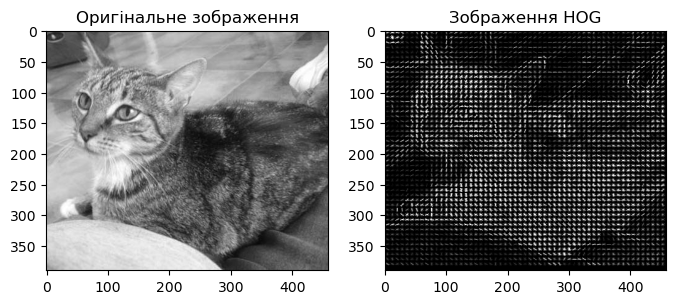

In [2]:
import cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

image = cv2.imread("C:\\Users\\Bruger\\Downloads\\cat.jpg", cv2.IMREAD_GRAYSCALE)

orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

features, hog_image = hog(image, orientations=orientations,
                          pixels_per_cell=pixels_per_cell,
                          cells_per_block=cells_per_block,
                          block_norm='L2-Hys', visualize=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Оригінальне зображення')

plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
plt.title('Зображення HOG')
plt.show()

In [3]:
import numpy as np
import tensorflow as tf
from sklearn import model_selection
from sklearn import svm
from sklearn import metrics
from skimage.feature import hog

(X, y), _ = tf.keras.datasets.cifar10.load_data()

y = y.ravel()  

def extract_hog_features(images):
    hog_features = []
    for image in images:
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        features = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
        hog_features.append(features)
    return np.array(hog_features)

X_hog = extract_hog_features(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_hog, y, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.5231
Precision: 0.5207670392534577
Recall: 0.5231
F1 Score: 0.5198756161674076


In [38]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

def extract_sift_features(images, max_features=100):
    sift = cv2.SIFT_create(nfeatures=max_features)
    sift_features = []
    
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  
        keypoints, sift_feature = sift.detectAndCompute(gray, None)
        
        if sift_feature is not None:
            sift_features.append(sift_feature)
    
    return sift_features

x_train_sift = extract_sift_features(x_train, max_features=100)
x_test_sift = extract_sift_features(x_test, max_features=100)

svm_classifier_sift = SVC()

x_train_sift_flat = np.vstack(x_train_sift)
x_test_sift_flat = np.vstack(x_test_sift)

y_train = y_train[:x_train_sift_flat.shape[0]]
y_test = y_test[:x_test_sift_flat.shape[0]]

svm_classifier_sift.fit(x_train_sift_flat, y_train)

y_pred_sift = svm_classifier_sift.predict(x_test_sift_flat)

accuracy_sift = accuracy_score(y_test, y_pred_sift)
precision_sift = precision_score(y_test, y_pred_sift, average='weighted')
recall_sift = recall_score(y_test, y_pred_sift, average='weighted')
f1_sift = f1_score(y_test, y_pred_sift, average='weighted')

print("Accuracy (SIFT):", accuracy_sift)
print("Precision (SIFT):", precision_sift)
print("Recall (SIFT):", recall_sift)
print("F1 Score (SIFT):", f1_sift)

C:\Users\Bruger\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [656496, 50000]

In [34]:
print("Shape of x_train before feature extraction:", x_train.shape)
print("Shape of x_test before feature extraction:", x_test.shape)
print("Shape of y_train before feature extraction:", y_train.shape)
print("Shape of y_test before feature extraction:", y_test.shape)

Shape of x_train before feature extraction: (50000, 32, 32, 3)
Shape of x_test before feature extraction: (10000, 32, 32, 3)
Shape of y_train before feature extraction: (50000, 1)
Shape of y_test before feature extraction: (10000, 1)


In [35]:
print("Shape of x_train after feature extraction:", len(x_train_sift))
print("Shape of x_test after feature extraction:", len(x_test_sift))
print("Shape of y_train before feature extraction:", y_train.shape)
print("Shape of y_test before feature extraction:", y_test.shape)

Shape of x_train after feature extraction: 49905
Shape of x_test after feature extraction: 9986
Shape of y_train before feature extraction: (50000, 1)
Shape of y_test before feature extraction: (10000, 1)


In [37]:
print("Shape of x_train_sift_flat:", x_train_sift_flat.shape)
print("Shape of x_test_sift_flat:", x_test_sift_flat.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train_sift_flat: (656496, 128)
Shape of x_test_sift_flat: (131540, 128)
Shape of y_train: (49905, 1)
Shape of y_test: (9986, 1)


In [39]:
print("Shape of x_train_sift_flat:", x_train_sift_flat.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test_sift_flat:", x_test_sift_flat.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train_sift_flat: (656496, 128)
Shape of y_train: (50000, 1)
Shape of x_test_sift_flat: (131540, 128)
Shape of y_test: (10000, 1)


In [46]:
'''
Вже декілька разів намагалась переписати код, але все не виходить, вибиває одну і ту саму помилку
'''

'\nВже декілька разів намагалась переписати код, але все не виходить, вибиває одну і ту саму помилку\n'